#### Smart City project:

This code is just to visualize json files.

In [1]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)
from IPython.display import display

%matplotlib inline

In [75]:
df = pd.read_json('uwo_sample_tls.json')  #Reading a json file into panda df.

#df.head()



In [76]:
#SensorLog3001-12m.txt

#df = pd.read_csv('SensorLog3001-12m.txt', sep=",", header=None)  #Reading a json file into panda df.
data = np.loadtxt("SensorLog3001-12m.txt",dtype='str',delimiter=',')
#dataset=pd.read_csv("SensorLog3001-12m.txt", header=None, engine='python', sep=',', names=None, 
#                index_col=None, usecols=None, squeeze=False)

#dataset.head()

#print(np.shape(data))

dataset = pd.DataFrame({'House_Number': data[:, 0], 'Sensor_num': data[:, 1], 'Status': data[:, 2], 'Day': data[:, 3], 'Month': data[:, 4], 'Year': data[:, 5], 'Hour': data[:, 6], 'Min': data[:, 7], 'Counter': data[:, 8], 'Time_elapsed': data[:, 9]}
                      , columns=['House_Number', 'Sensor_num', 'Status','Day','Month', 'Year', 'Hour', 'Min', 'Counter','Time_elapsed' ])

dataset.head(40)

#bed = dataset[Sensor_num='Sensor 5']

bed = dataset[dataset['Sensor_num']=='Sensor 8']

bed.head(20)


,House_Number,Sensor_num,Status,Day,Month,Year,Hour,Min,Counter,Time_elapsed
197,Res3001,Sensor 8,ABS Bed Sensor Occupied,23,10,2017,22,10,1330,1
202,Res3001,Sensor 8,ABS Bed Sensor Vacated,24,10,2017,4,42,282,325
206,Res3001,Sensor 8,ABS Bed Sensor Occupied,24,10,2017,4,46,286,1
213,Res3001,Sensor 8,ABS Bed Sensor Vacated,24,10,2017,8,30,510,1
322,Res3001,Sensor 8,ABS Bed Sensor Occupied,24,10,2017,23,0,1380,13
327,Res3001,Sensor 8,ABS Bed Sensor Vacated,25,10,2017,5,8,308,1
328,Res3001,Sensor 8,ABS Bed Sensor Occupied,25,10,2017,5,11,311,3
331,Res3001,Sensor 8,ABS Bed Sensor Vacated,25,10,2017,8,52,532,0
425,Res3001,Sensor 8,ABS Bed Sensor Occupied,25,10,2017,23,24,1404,2
431,Res3001,Sensor 8,ABS Bed Sensor Vacated,26,10,2017,2,54,174,0


In [77]:
#bed.head()

stacked = bed[['Status']].stack()
bed.loc[:, ['Status']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()


bed.head(20)

type(bed.Status.values[0])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


int

<class 'numpy.int64'>


,Status,Day,Month,Counter,Time_elapsed
3937,1,24,11,396,1
3942,0,24,11,400,2
3949,1,24,11,519,1
4048,0,24,11,1355,1


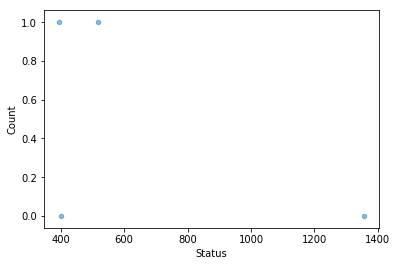

In [78]:
bed_data = bed.drop(['House_Number','Sensor_num','Year','Hour','Min'], axis = 'columns')
bed_data[['Status','Day','Month','Counter','Time_elapsed']] = bed_data[['Status','Day','Month','Counter','Time_elapsed']].astype(int)

bed_data_24 = bed_data[(bed_data['Day']==24) & (bed_data['Month']==11)]

print(type(count[0]))
ax = bed_data_24.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Status')
ax.set_ylabel('Count')

bed_data_24.head(100)


<class 'numpy.int64'>


Text(0,0.5,'Status')

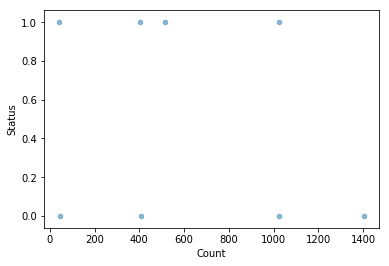

In [79]:

bed_data_25 = bed_data[(bed_data['Day']==25) & (bed_data['Month']==11)]

print(type(count[0]))
ax = bed_data_25.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Count')
ax.set_ylabel('Status')

<class 'numpy.int64'>


Text(0,0.5,'Status')

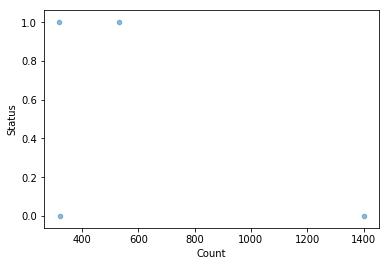

In [81]:
bed_data_26 = bed_data[(bed_data['Day']==26) & (bed_data['Month']==11)]

print(type(count[0]))
ax = bed_data_26.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Count')
ax.set_ylabel('Status')

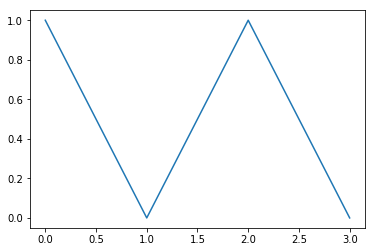

In [82]:
plt.plot(bed_data_26.Status.values)